In [413]:
import datetime

import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
from tensorflow.python.keras.layers import Dropout

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.unicode_minus'] = False

In [414]:
# 한글 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

데이터 전처리

In [415]:
df2 =pd.read_csv('./data/test_Gonion.csv', index_col = 0)
display(df2)

,날짜,품목명,평균가격,전일평균가격,전년가격,등급
1,20170101,대파(일반),0.0,2833.0,0.0,특
2,20170101,대파(일반),0.0,2164.0,0.0,상
3,20170101,대파(일반),0.0,1747.0,0.0,중
4,20170101,대파(일반),0.0,1214.0,0.0,하
1,20170102,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
4,20210526,대파(일반),1180.0,1392.0,1208.0,하
1,20210527,대파(일반),3699.0,3601.0,1952.0,특
2,20210527,대파(일반),1554.0,2152.0,1639.0,상
3,20210527,대파(일반),1247.0,1572.0,1500.0,중


In [416]:
dfw = pd.read_csv('./data/weather.csv', encoding='CP949')
display(dfw)

,지점,지점명,일시,평균기온(°C),일강수량(mm),일 최심신적설(cm)
0,268,진도군,20170101,4.3,NaN,NaN
1,268,진도군,20170102,8.1,0.0,NaN
2,268,진도군,20170103,5.1,NaN,NaN
3,268,진도군,20170104,4.4,NaN,NaN
4,268,진도군,20170105,7.5,0.5,NaN
...,...,...,...,...,...,...
1590,268,진도군,20210523,19.7,0.0,NaN
1591,268,진도군,20210524,17.6,0.0,NaN
1592,268,진도군,20210525,17.3,NaN,NaN
1593,268,진도군,20210526,17.1,0.7,NaN


In [417]:
#nan to zero
dfw = dfw.fillna(0)

In [418]:
# 인덱스 수정 1,2,3,4,1,2,3,4,... -> 숫자 순서대로
index = range(df2.shape[0])
df2.index = index
display(df2)

,날짜,품목명,평균가격,전일평균가격,전년가격,등급
0,20170101,대파(일반),0.0,2833.0,0.0,특
1,20170101,대파(일반),0.0,2164.0,0.0,상
2,20170101,대파(일반),0.0,1747.0,0.0,중
3,20170101,대파(일반),0.0,1214.0,0.0,하
4,20170102,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
6385,20210526,대파(일반),1180.0,1392.0,1208.0,하
6386,20210527,대파(일반),3699.0,3601.0,1952.0,특
6387,20210527,대파(일반),1554.0,2152.0,1639.0,상
6388,20210527,대파(일반),1247.0,1572.0,1500.0,중


In [419]:
# 하루날짜가 4개인 것도 있고 아닌 것도 있음. 날짜에 맞춰서 기온과 강수량을 매핑해줘야됨
# 근데 이것보단 어차피 그룹으로 나눌거라면,, 그룹으로 나누고 for문 돌리는 것도 나쁘지 않을 듯
# 일단 lst

temp_list = []
rain_list = []
day_list = []
count = 0
for i1 in df2.index:
    for i2 in dfw.index:
        if df2['날짜'][i1] != dfw['일시'][i2]:
            continue
        temp_list.append(dfw['평균기온(°C)'][i2])
        rain_list.append(dfw['일강수량(mm)'][i2])
        day_list.append(dfw['일시'][i2])
        count +=1


print('temp_list', temp_list)
print(len(temp_list))
print('rain_list', rain_list)
print(len(rain_list))

temp_list [4.3, 4.3, 4.3, 4.3, 8.1, 5.1, 5.1, 5.1, 5.1, 4.4, 4.4, 4.4, 4.4, 7.5, 7.5, 7.5, 7.5, 7.2, 7.2, 7.2, 7.2, 7.1, 7.1, 7.1, 7.1, 8.1, 5.6, 5.6, 5.6, 5.6, 4.2, 4.2, 4.2, 4.2, 1.9, 1.9, 1.9, 1.9, 3.7, 3.7, 3.7, 3.7, 3.1, 3.1, 3.1, 3.1, 0.1, 0.1, 0.1, 0.1, -0.5, 1.8, 1.8, 1.8, 1.8, 0.8, 0.8, 0.8, 0.8, 3.5, 3.5, 3.5, 3.5, 2.5, 2.5, 2.5, 2.5, 0.8, 0.8, 0.8, 0.8, 1.9, 1.9, 1.9, 1.9, 0.2, -0.5, -0.5, -0.5, -0.5, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 1.3, 1.3, 1.3, 1.3, 3.1, 3.1, 3.1, 3.1, 3.9, 3.9, 3.9, 3.9, 8.8, 1.2, -0.4, -0.4, -0.4, -0.4, 1.8, 1.8, 1.8, 1.8, 0.9, 0.9, 0.9, 0.9, 1.7, 1.7, 1.7, 1.7, 6.9, 6.9, 6.9, 6.9, 6.2, 2.9, 2.9, 2.9, 2.9, 2.4, 2.4, 2.4, 2.4, 2.6, 2.6, 2.6, 2.6, 0.0, 0.0, 0.0, 0.0, -1.5, -1.5, -1.5, -1.5, 0.2, 0.2, 0.2, 0.2, 1.7, 2.9, 2.9, 2.9, 2.9, 3.8, 3.8, 3.8, 3.8, 2.1, 2.1, 2.1, 2.1, 8.5, 8.5, 8.5, 8.5, 5.1, 5.1, 5.1, 5.1, 0.7, 0.7, 0.7, 0.7, 6.0, 3.8, 3.8, 3.8, 3.8, 3.2, 3.2, 3.2, 3.2, 8.1, 8.1, 8.1, 8.1, 2.6, 2.6, 2.6, 2.6, 1.6, 1.6, 1.6, 1.6, 4.0, 4.0, 4

위의 셀과 위위셀을 보면 rows 수가 차이가 있음. -> 차집합으로 문제를 해결함

In [420]:
dd = np.array(df2['날짜'].tolist())
dl = np.array(day_list)
intersection = np.array(list(set(dd)-set(dl)))
print(intersection)
print(len(intersection))

[20170720 20170721 20170722 20190529 20191202 20191017 20191018 20171116
 20171221 20171222 20171031 20171130 20200702]
13


여기서 나온 13개의 열을 엑셀로 직접 확인했는데, 4개씩 누락되어있었음.
그러니까 날짜 데이터가 13일이 누락되어있어서 13*4만큼의 날짜가 추가되지 않아 52개의 데이터가 차이났었음

In [421]:
# 누락된 날짜 삭제
tf = []

for i in df2.index:
    if df2['날짜'][i] in intersection:
        df2 = df2.drop(index = i, axis = 0)

df22 = df2.copy()
print(len(df22.index))


6338


아까 자른 온도와 강수량 데이터를 파 데이터에 붙여준다

In [422]:
df22['평균기온'] = temp_list
df22['강수량'] = rain_list
display(df22)

,날짜,품목명,평균가격,전일평균가격,전년가격,등급,평균기온,강수량
0,20170101,대파(일반),0.0,2833.0,0.0,특,4.3,0.0
1,20170101,대파(일반),0.0,2164.0,0.0,상,4.3,0.0
2,20170101,대파(일반),0.0,1747.0,0.0,중,4.3,0.0
3,20170101,대파(일반),0.0,1214.0,0.0,하,4.3,0.0
4,20170102,NaN,NaN,NaN,NaN,NaN,8.1,0.0
...,...,...,...,...,...,...,...,...
6385,20210526,대파(일반),1180.0,1392.0,1208.0,하,17.1,0.7
6386,20210527,대파(일반),3699.0,3601.0,1952.0,특,16.9,0.6
6387,20210527,대파(일반),1554.0,2152.0,1639.0,상,16.9,0.6
6388,20210527,대파(일반),1247.0,1572.0,1500.0,중,16.9,0.6


등급별 그룹 나누기

In [423]:
grouped = df22.groupby('등급')

for name, group in grouped:
    print('groupname: ', name)
    print('groupdata: ')
    print(group)

# 그룹 추출
# 일단 '상'인 파부터 해보자
adf = grouped.get_group(name='상')

display(adf.head())


groupname:  상
groupdata: 
            날짜     품목명    평균가격  전일평균가격    전년가격 등급  평균기온  강수량
1     20170101  대파(일반)     0.0  2164.0     0.0  상   4.3  0.0
6     20170103  대파(일반)  2164.0     0.0  1926.0  상   5.1  0.0
10    20170104  대파(일반)  2100.0  2164.0  2126.0  상   4.4  0.0
14    20170105  대파(일반)  2100.0  2100.0  1848.0  상   7.5  0.5
18    20170106  대파(일반)  2100.0  2100.0  1865.0  상   7.2  0.2
...        ...     ...     ...     ...     ... ..   ...  ...
6371  20210523  대파(일반)     0.0  1883.0  1546.0  상  19.7  0.0
6375  20210524  대파(일반)  1804.0     0.0     0.0  상  17.6  0.0
6379  20210525  대파(일반)  2153.0  1804.0  1614.0  상  17.3  0.0
6383  20210526  대파(일반)  2152.0  2153.0  1623.0  상  17.1  0.7
6387  20210527  대파(일반)  1554.0  2152.0  1639.0  상  16.9  0.6

[1581 rows x 8 columns]
groupname:  중
groupdata: 
            날짜     품목명    평균가격  전일평균가격    전년가격 등급  평균기온  강수량
2     20170101  대파(일반)     0.0  1747.0     0.0  중   4.3  0.0
7     20170103  대파(일반)  1747.0     0.0  1611.0  중   5.1  0.0
11    20

,날짜,품목명,평균가격,전일평균가격,전년가격,등급,평균기온,강수량
1,20170101,대파(일반),0.0,2164.0,0.0,상,4.3,0.0
6,20170103,대파(일반),2164.0,0.0,1926.0,상,5.1,0.0
10,20170104,대파(일반),2100.0,2164.0,2126.0,상,4.4,0.0
14,20170105,대파(일반),2100.0,2100.0,1848.0,상,7.5,0.5
18,20170106,대파(일반),2100.0,2100.0,1865.0,상,7.2,0.2


In [426]:
adf.to_csv('./data/best.csv',encoding = 'utf-8-sig' )

## LSTM 실습 해보자

In [ ]:
import tensorflow as tf
TRAIN_SPLIT = 900
tf.random.set_seed(13)

def create_time_steps(length):
    return list(range(-length, 0))


## '날짜'를 Datetime으로 변경
https://www.python2.net/questions-22872.htm

In [398]:
adf['날짜'] = adf['날짜'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

display(adf.head())


c:\201814471\setup\envs\py37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,날짜,품목명,평균가격,전일평균가격,전년가격,등급,평균기온,강수량
1,2017-01-01,대파(일반),0.0,2164.0,0.0,상,4.3,0.0
6,2017-01-03,대파(일반),2164.0,0.0,1926.0,상,5.1,0.0
10,2017-01-04,대파(일반),2100.0,2164.0,2126.0,상,4.4,0.0
14,2017-01-05,대파(일반),2100.0,2100.0,1848.0,상,7.5,0.5
18,2017-01-06,대파(일반),2100.0,2100.0,1865.0,상,7.2,0.2


In [368]:
def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize = 10,
                     label = labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], lable = labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+5) * 2])
    plt.xlabel('Time-Step')
    return plt

## 3개의 특징 추출
온도, 대기압,공기 밀도 -> 온도 예측
그럼 이것도

가격, 기온, 강수량 -> 가격 예측 ,,!!!

In [369]:
features_considered = ['평균가격', '평균기온', '강수량']

features = adf[features_considered]
features.index= adf['날짜']
features.head()

,평균가격,평균기온,강수량
날짜,,,
2017-01-01,0.0,4.3,0.0
2017-01-03,2164.0,5.1,0.0
2017-01-04,2100.0,4.4,0.0
2017-01-05,2100.0,7.5,0.5
2017-01-06,2100.0,7.2,0.2


array([<AxesSubplot:xlabel='날짜'>, <AxesSubplot:xlabel='날짜'>,
       <AxesSubplot:xlabel='날짜'>], dtype=object)

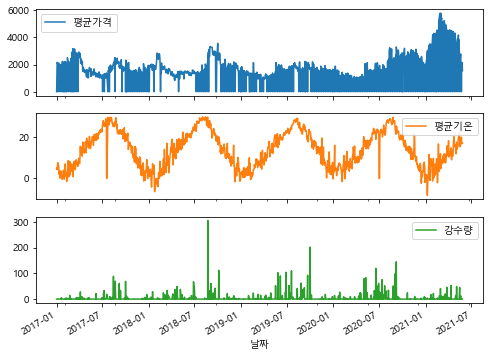

In [370]:
features.plot(subplots = True)

## 표준화

In [371]:
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis= 0)
data_std = dataset[:TRAIN_SPLIT].std(axis = 0)

dataset = (dataset - data_mean)/data_std

display(dataset)
display(dataset[:, 1])

array([[-2.123021  , -1.06357378, -0.21864706],
       [ 0.89703999, -0.97221237, -0.21864706],
       [ 0.8077221 , -1.05215361, -0.21864706],
       ...,
       [ 0.88168848,  0.42104924, -0.21864706],
       [ 0.88029288,  0.39820889, -0.17253597],
       [ 0.0457289 ,  0.37536853, -0.17912327]])

array([-1.06357378, -0.97221237, -1.05215361, ...,  0.42104924,
        0.39820889,  0.37536853])

## Multi-Step model

다단계 에측 모델은 과거 히스토리로 미래의 값 범위를 예측하는 방법으로 미래 시퀀스를 예측
지난 1000일의 기록을 이용하여 15일 예측


In [372]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])  #Multi-Step, 시퀀스로 추출

  return np.array(data), np.array(labels)

## 데이터 윈도우 추출

1000일간 기록을 이용하여 15일간의 가격을 예측

window 추출
- x: 지난 1000일 관측값 1000
- step: 이동단위 1일 5
- y: 미래 예측값 14

In [373]:
past_history = 500
future_targe = 14
STEP = 5

x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:,0], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_targe, STEP, single_step=False)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:,0],
                                             TRAIN_SPLIT, None, past_history,
                                             future_targe, STEP, single_step=False)

In [374]:
print('Single window of past history : {}'.format(x_train_multi[0].shape))
print('\nTarget temperature to predict : {}'. format(y_train_multi[0].shape))
print('\n\n\nx_val_multi\n',x_val_multi)
print('\ny_val_multi\n',y_val_multi)

Single window of past history : (100, 3)

Target temperature to predict : (14,)



x_val_multi
 [[[ 0.29274867  0.98063792 -0.05396461]
  [ 0.14062915  1.1405204   0.67063817]
  [ 0.16993658  1.36892394 -0.21864706]
  ...
  [ 1.91442652 -0.32126227 -0.21864706]
  [ 1.84604252  0.86643615 -0.19888517]
  [ 1.84185574 -0.64102723 -0.21864706]]

 [[-2.123021    1.1405204  -0.21864706]
  [ 0.07782751  1.24330199  0.93413009]
  [-0.01009478  1.36892394 -0.21205976]
  ...
  [ 1.1384774  -0.13853944 -0.21864706]
  [ 1.69392299  0.52383084  0.45984464]
  [ 2.25076418 -0.59534652 -0.21864706]]

 [[ 0.45882411  1.09483969 -0.21864706]
  [-0.03242425  1.1405204   7.02738076]
  [-0.27386166  1.41460465 -0.18571057]
  ...
  [-2.123021   -0.14995961 -0.21864706]
  [ 1.59762715 -0.36694298 -0.21864706]
  [ 2.05259013 -0.43546404 -0.21864706]]

 ...

 [[-0.02963307 -1.10925449 -0.21864706]
  [-2.123021   -1.48612034 -0.21864706]
  [-0.04917136 -0.37836316  0.67063817]
  ...
  [ 3.07137225  0.22690623 -

## LSTM 데이터 입력 구조로 학습데이터, 테스트 데이터 추출

In [375]:
# train, validation data를 텐스로 변경하여 batch size만큼 추출

BATCH_SIZE = 100
BUFFER_SIZE= 10000

train_data_multi= tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [376]:
print('train_data_multi\n',train_data_multi)
print('\n\nval_data_multi\n',val_data_multi)

train_data_multi
 <RepeatDataset shapes: ((None, 100, 3), (None, 14)), types: (tf.float64, tf.float64)>


val_data_multi
 <RepeatDataset shapes: ((None, 100, 3), (None, 14)), types: (tf.float64, tf.float64)>


## 다단계 예측 모델 Plotting

In [377]:
def multi_step_plot(history, true_future, prediction):
    plt.figure(figsize=(12, 6))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)

    plt.plot(num_in, np.array(history[:,1]), label = 'History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
             label = 'True Future')
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
                 label = 'Predicted Future')

    plt.legend(loc = 'upper left')
    plt.show()

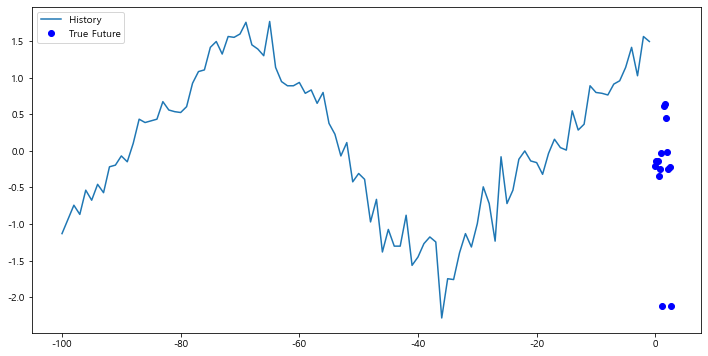

In [378]:
for x, y in train_data_multi.take(1):
    multi_step_plot(x[0], y[0], np.array([0]))

## 모델 구성

다단계 예측모델은 이전 작업보다 약간 복잡하기 때문에 두 개의 LSTM 계층으로 구성
마지막 layer에서는 72개의 예측을 출력

In [379]:
print(x_train_multi.shape[-2:])
print(x_train_multi)

(100, 3)
[[[-2.123021   -1.06357378 -0.21864706]
  [-2.123021   -0.74380882 -0.15277408]
  [ 0.64583344 -1.20061591 -0.21205976]
  ...
  [-0.26269693  0.53525101  0.27540029]
  [-0.10499503  0.64945278 -0.21864706]
  [-0.19291733  0.64945278 -0.21864706]]

 [[ 0.89703999 -0.97221237 -0.21864706]
  [ 0.8077221  -0.91511148 -0.21864706]
  [-2.123021   -1.54322122 -0.21205976]
  ...
  [-0.21106002  0.32968782  0.20952731]
  [-0.07847879  0.70655367 -0.21205976]
  [-0.02684189  0.92353703 -0.21864706]]

 [[ 0.8077221  -1.05215361 -0.21864706]
  [ 0.8077221  -1.07499396 -0.21864706]
  [ 0.64583344 -1.34907821 -0.21864706]
  ...
  [ 0.01921265  0.36394836 -0.21864706]
  [-0.16779667  0.8892765  -0.21864706]
  [-0.10359944  0.79791509 -0.21864706]]

 ...

 [[ 0.4099784  -0.99505272 -0.21864706]
  [ 0.43649464 -0.49256493  1.39524095]
  [ 0.40439603 -0.72096847 -0.15277408]
  ...
  [ 0.00944351  0.95779757 -0.21864706]
  [-2.123021    0.9920581  -0.21205976]
  [ 0.0443333   1.18620111 -0.21864

In [380]:
'''
multi_step_model =tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape =x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(14))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss = 'mae')
'''

"\nmulti_step_model =tf.keras.models.Sequential()\nmulti_step_model.add(tf.keras.layers.LSTM(32,\n                                          return_sequences=True,\n                                          input_shape =x_train_multi.shape[-2:]))\nmulti_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))\nmulti_step_model.add(tf.keras.layers.Dense(14))\n\nmulti_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss = 'mae')\n"

In [381]:
#from keras.callbavks import EarlyStopping

multi_step_model=tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(16,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.Dense(14))
multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [382]:
multi_step_model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 128)               67584     
_________________________________________________________________
dense_18 (Dense)             (None, 14)                1806      
Total params: 69,390
Trainable params: 69,390
Non-trainable params: 0
_________________________________________________________________


## 모델 학습

In [383]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

early_stopping = tf.keras.callbacks.EarlyStopping()
multi_step_history = multi_step_model.fit(train_data_multi, epochs = EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50)

Epoch 1/10
200/200 [==============================] - 16s 73ms/step - loss: 0.5697 - val_loss: 3.0162

### 학습결과 플로팅

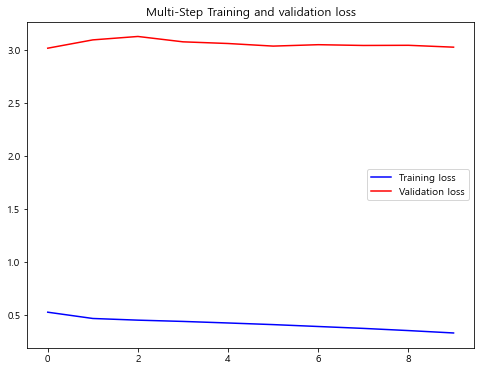

In [384]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label = 'Training loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

### 학습된 모델을 이용한 다단계 예측

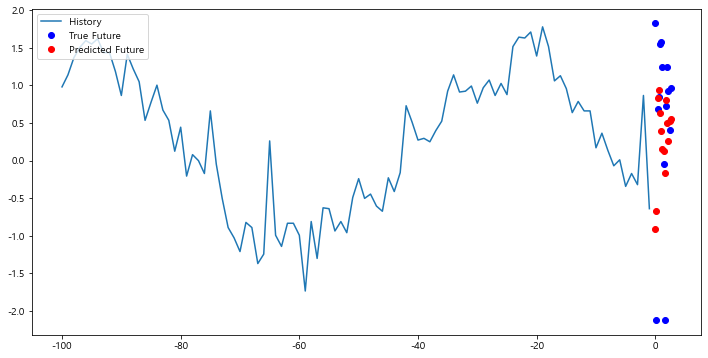

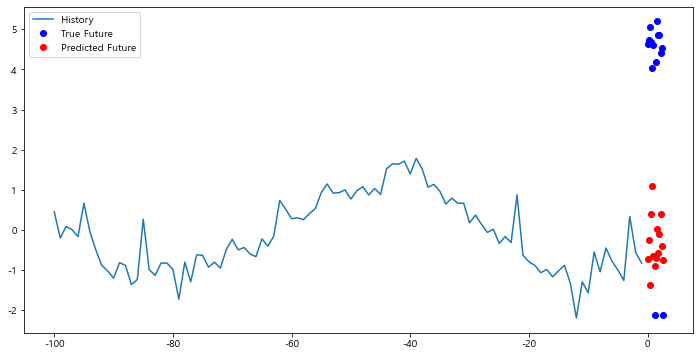

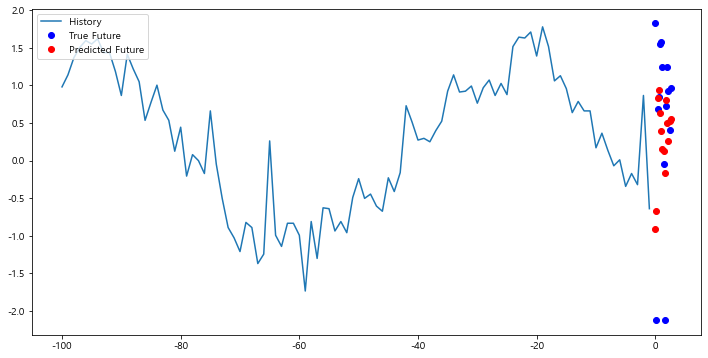

In [385]:
for x, y in val_data_multi.take(3):
    multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])

### 모델 평가하기

In [386]:
trainScore = multi_step_model.evaluate(x_train_multi, y_train_multi, verbose=0)
print('Train Score: ',trainScore)
valScore = multi_step_model.evaluate(x_val_multi, y_val_multi, verbose=0)
print('Validation Score: ',valScore)

Train Score:  0.31962132453918457
Validation Score:  3.025906801223755
